In [2]:
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\naama\Desktop\Chen\projects\form\.conda\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [34]:
# dataset = load_dataset("McAuley-Lab/Amazon-Reviews-2023")
# raw_review_All_Beauty = load_dataset("McAuley-Lab/Amazon-Reviews-2023", "raw_review_All_Beauty", trust_remote_code=True)
raw_review_All_Beauty = load_dataset("McAuley-Lab/Amazon-Reviews-2023", "raw_review_All_Beauty", split='full')

In [35]:
raw_review_All_Beauty

Dataset({
    features: ['rating', 'title', 'text', 'images', 'asin', 'parent_asin', 'user_id', 'timestamp', 'helpful_vote', 'verified_purchase'],
    num_rows: 701528
})

In [37]:
for i in range(2):
  print(raw_review_All_Beauty[i])

{'rating': 5.0, 'title': 'Such a lovely scent but not overpowering.', 'text': "This spray is really nice. It smells really good, goes on really fine, and does the trick. I will say it feels like you need a lot of it though to get the texture I want. I have a lot of hair, medium thickness. I am comparing to other brands with yucky chemicals so I'm gonna stick with this. Try it!", 'images': [], 'asin': 'B00YQ6X8EO', 'parent_asin': 'B00YQ6X8EO', 'user_id': 'AGKHLEW2SOWHNMFQIJGBECAF7INQ', 'timestamp': 1588687728923, 'helpful_vote': 0, 'verified_purchase': True}
{'rating': 4.0, 'title': 'Works great but smells a little weird.', 'text': 'This product does what I need it to do, I just wish it was odorless or had a soft coconut smell. Having my head smell like an orange coffee is offputting. (granted, I did know the smell was described but I was hoping it would be light)', 'images': [], 'asin': 'B081TJ8YS3', 'parent_asin': 'B081TJ8YS3', 'user_id': 'AGKHLEW2SOWHNMFQIJGBECAF7INQ', 'timestamp': 1

In [38]:
raw_review_All_Beauty[0]

{'rating': 5.0,
 'title': 'Such a lovely scent but not overpowering.',
 'text': "This spray is really nice. It smells really good, goes on really fine, and does the trick. I will say it feels like you need a lot of it though to get the texture I want. I have a lot of hair, medium thickness. I am comparing to other brands with yucky chemicals so I'm gonna stick with this. Try it!",
 'images': [],
 'asin': 'B00YQ6X8EO',
 'parent_asin': 'B00YQ6X8EO',
 'user_id': 'AGKHLEW2SOWHNMFQIJGBECAF7INQ',
 'timestamp': 1588687728923,
 'helpful_vote': 0,
 'verified_purchase': True}

In [90]:
All_Beauty = pd.DataFrame(raw_review_All_Beauty.to_pandas())
All_Beauty = All_Beauty.drop(['images'], axis=1)
All_Beauty['review'] = All_Beauty['title'] + ' ' + All_Beauty['text']
All_Beauty = All_Beauty.drop(['title', 'text'], axis=1)
All_Beauty['rating'] = All_Beauty['rating'].astype('category')
All_Beauty['timestamp'] = pd.to_datetime(All_Beauty['timestamp'], unit='ms')
All_Beauty['year'] = All_Beauty['timestamp'].dt.year
All_Beauty['month'] = All_Beauty['timestamp'].dt.month
All_Beauty['date'] = All_Beauty['timestamp'].dt.date
All_Beauty['day_of_week'] = All_Beauty['timestamp'].dt.day_name()
All_Beauty['hour'] = All_Beauty['timestamp'].dt.hour

All_Beauty = All_Beauty.drop(['timestamp'], axis=1)

All_Beauty

,rating,asin,parent_asin,user_id,helpful_vote,verified_purchase,review,year,month,date,day_of_week,hour
0,5.0,B00YQ6X8EO,B00YQ6X8EO,AGKHLEW2SOWHNMFQIJGBECAF7INQ,0,True,Such a lovely scent but not overpowering. This...,2020,5,2020-05-05,Tuesday,14
1,4.0,B081TJ8YS3,B081TJ8YS3,AGKHLEW2SOWHNMFQIJGBECAF7INQ,1,True,Works great but smells a little weird. This pr...,2020,5,2020-05-04,Monday,18
2,5.0,B07PNNCSP9,B097R46CSY,AE74DYR3QUGVPZJ3P7RFWBGIX7XQ,2,True,"Yes! Smells good, feels great!",2020,5,2020-05-16,Saturday,21
3,1.0,B09JS339BZ,B09JS339BZ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,0,True,Synthetic feeling Felt synthetic,2022,1,2022-01-28,Friday,18
4,5.0,B08BZ63GMJ,B08BZ63GMJ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,0,True,A+ Love it,2020,12,2020-12-30,Wednesday,10
...,...,...,...,...,...,...,...,...,...,...,...,...
701523,4.0,B006YUIWKA,B006YUIWKA,AFIXGFVEGLMOTMBTJL7H3VSIETDQ,0,True,Four Stars Conditioner is great shampoo not a...,2016,11,2016-11-04,Friday,2
701524,1.0,B006YUIWKA,B006YUIWKA,AFV7YZFOJF564EZGET5LG45K4QEA,0,False,Pretty Did not work! Used the whole bottle and...,2016,12,2016-12-05,Monday,3
701525,5.0,B06ZZV9MZT,B06ZZV9MZT,AHYDCWDMMVMLBX7FY7M7JKADKRDQ,0,True,Great sunless tanner Product as expected. Ship...,2020,5,2020-05-27,Wednesday,2
701526,5.0,B000HB6VLE,B000HB6VLE,AF6ZIAEN7TQ2WY5ZL77F6JDPV7XQ,4,False,The Crown on top is a Ring!!! Not only is it a...,2007,7,2007-07-18,Wednesday,22


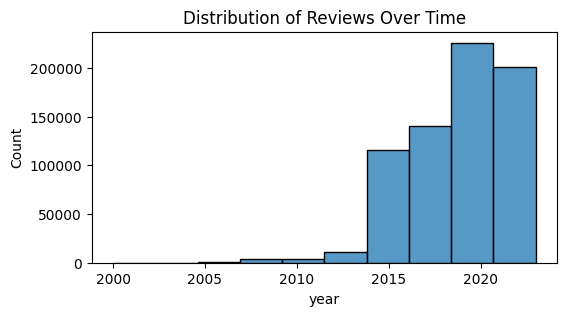

In [94]:
# plot distribution of reviews over time


plt.figure(figsize=(6, 3))
sns.histplot(All_Beauty['year'], kde=False, bins=10)
plt.title('Distribution of Reviews Over Time')
plt.show()

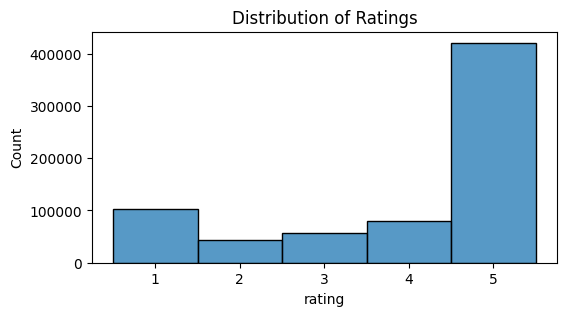

In [106]:
plt.figure(figsize=(6, 3))
sns.histplot(All_Beauty['rating'], kde=False)
plt.title('Distribution of Ratings')
plt.show()